In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy

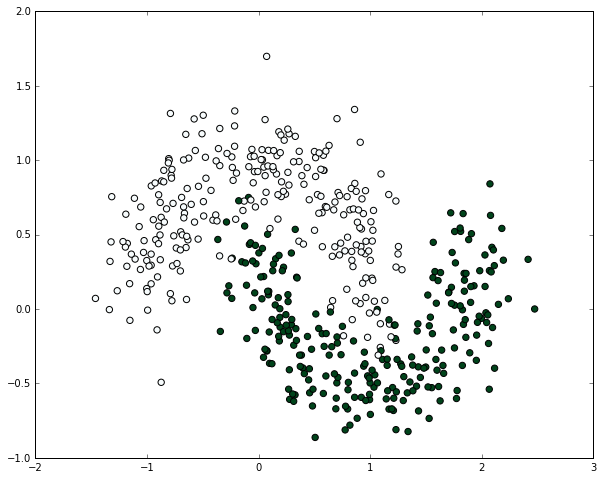

In [7]:
%matplotlib inline
# import and visualise input data
matplotlib.rcParams['figure.figsize']=(10.0, 8.0)
train = pd.read_csv("/home/shi144/practice/deep-learning-keras-tensorflow/data/intro_to_ann.csv")
X, y = np.array(train.ix[:, 0:2]), np.array(train.ix[:,2])
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.BuGn)

In [34]:
# define function that generates a random number where a<= num < b, 
# used for weights initialisation 
import random
random.seed(0)
random.random()
def rand(a,b):
    return (b-a)*random.random() + a

In [35]:
def makeMatrix(I, J, fill=0.0):
    return np.zeros([I,J])

In [36]:
# sigmoid function and its derivative
def sigmoid(x):
    return 1/(1+np.exp(-x))
def dsigmoid(y):
    return y-y**2

In [43]:
class MLP:
    def __init__(self, i, h, o):
        # number of input, hidden and output nodes
        self.ni = i + 1 # +1 for bias
        self.nh = h
        self.no = o
        
        # activations
        self.i = [1.0]*self.ni
        self.h = [1.0]*self.nh
        self.o = [1.0]*self.no
        
        # weights
        self.weights_i = makeMatrix(self.ni, self.nh)
        self.weights_o = makeMatrix(self.nh, self.no)
        for i in range(self.ni):
            for h in range(self.nh):
                self.weights_i[i][h] = rand(-0.2,0.2)
        for h in range(self.nh):
            for o in range(self.no):
                self.weights_o[h][o] = rand(-0.2,0.2)
        # change in weights for momentum
        self.change_i = makeMatrix(self.ni, self.nh)
        self.change_o = makeMatrix(self.nh, self.no)
    
    def forwardPropagate(self, inputs):
        if len(inputs) != self.ni - 1:
            print(inputs)
            raise ValueError('Wrong number of inputs')
        
        # input activations
        for i in range(self.ni - 1):
            self.i[i] = inputs[i]
        
        # hidden activations
        for h in range(self.nh):
            sum_h = 0.0
            for i in range(self.ni):
                sum_h += self.i[i] * self.weights_i[i][h]
            self.h[h] = sigmoid(sum_h)
        
        # output activations
        for o in range(self.no):
            sum_o = 0.0
            for h in range(self.nh):
                sum_o += self.h[h] * self.weights_o[h][o]
            self.o[o] = sigmoid(sum_o)
        
        return self.o[:]
    
    def backPropagate(self, targets, N, M):
        # N: learning rate
        # M: momentum factor (use the gradient of the last update)
        if len(targets) != self.no:
            print(targets)
            raise ValueError('Wrong number of targets')
        
        # calculate error terms for output
        output_deltas = np.zeros(self.no)
        for o in range(self.no):
            error = targets[o] - self.o[o]
            output_deltas[o] = dsigmoid(self.o[o])*error
        
        # calculate error terms for hidden
        hidden_deltas = np.zeros(self.nh)
        for h in range(self.nh):
            error = 0.0
            for o in range(self.no):
                error += output_deltas[o] * self.weights_o[h][o]
            hidden_deltas[h] = dsigmoid(self.h[h]) * error
        
        # update output weights
        for h in range(self.nh):
            for o in range(self.no):
                change = output_deltas[o] * self.h[h]
                self.weights_o[h][o] += N*change + M*self.change_o[h][o]
                self.change_o[h][o] = change
        
        # update input weights
        for i in range(self.ni):
            for h in range(self.nh):
                change = hidden_deltas[h]*self.i[i]
                self.weights_i[i][h] += N*change + M*self.change_i[i][h]
                self.change_i[i][h] = change
        
        # calculate error
        error = 0.0
        for o in range(len(targets)):
            error += 0.5*(targets[o]-self.o[o])**2
        return error
    
    def train(self, patterns, iterations=1000, N=0.5, M=0.1):
        patterns = list(patterns)
        for i in range(iterations):
            error = 0.0
            for p in patterns:
                inputs = p[0]
                targets = p[1]
                self.forwardPropagate(inputs)
                error += self.backPropagate([targets], N, M)
            if i%5 == 0:
                print('Error in iteration %d: %-.5f' % (i, error))
            print('Final training error: %-.5f' % error)
            
                

In [47]:
ann = MLP(2, 1, 1)
ann.train(zip(X,y), iterations=2)

Error in iteration 0: 59.53374
Final training error: 59.53374
Final training error: 48.93822
